# Prédiction de la température maximale à Paris par la moyenne

L’objectif de ce notebook est de prévoir la température maximale à Paris pour une date donnée en utilisant la moyenne sur cette date. C’est une approche naïve qui servira de benchmark aux modèles suivants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 10
%matplotlib inline
import sklearn
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
full_meteo = pd.read_csv("./formatted_data/full_meteo.csv", parse_dates=["DATE"])
full_meteo.head(3)

,DATE,MAX_TEMP,DAY,YEAR
0,1975-01-01,8.1,01-01,1975
1,1975-01-02,3.2,01-02,1975
2,1975-01-03,4.5,01-03,1975


In [3]:
print("Extension temporelle des données: [{} - {}]".format(full_meteo["DATE"].min(), full_meteo["DATE"].max()))

Extension temporelle des données: [1975-01-01 00:00:00 - 2019-05-31 00:00:00]


In [4]:
# Create simple mean predictor with sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.base import clone

class SimpleMeanPred(BaseEstimator, ClassifierMixin):
    """
    Compute mean temperature by date on training data and use it on test data to predict temperature at future date.
    """
    def __init__(self):
        pass
    
    def fit(self, train_df):
        """
        self.pred_df is the dataframe in which mean temperature by date (day of year) is saved.
        """
        self.pred_df = train_df.groupby("DAY").mean()[["MAX_TEMP"]]
            
    def predict(self, X):
        """
        Predict temperature for each date in input array X by taking the mean temperature for this date from self.pred_df.
        Naive implementation with for loop, could probably be optimized.
        """
        pred_array = []
        for x in X:
            pred_x = self.pred_df.loc[datetime.strftime(pd.Timestamp(x), format="%m-%d")]["MAX_TEMP"]
            pred_array.append(pred_x)
        return np.array(pred_array)

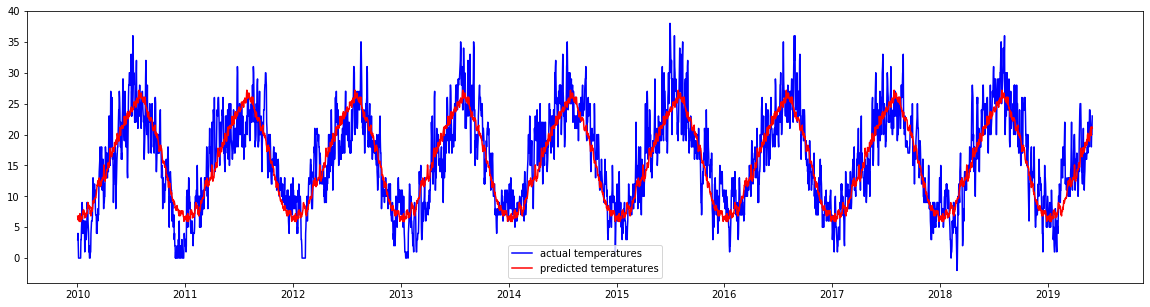

In [5]:
train_df = full_meteo[full_meteo["DATE"] <= datetime(2010, 1, 1)]
test_df = full_meteo[full_meteo["DATE"] > datetime(2010, 1, 1)]

mean_pred = SimpleMeanPred()
mean_pred.fit(train_df)

predictions = mean_pred.predict(test_df["DATE"].values)

plt.figure(1, figsize=(20, 5))
plt.plot(test_df["DATE"], test_df["MAX_TEMP"].values, label="actual temperatures", color="blue")
plt.plot(test_df["DATE"], predictions, label="predicted temperatures", color="red")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
print("mean squared error: {}".format(mean_squared_error(predictions, test_df["MAX_TEMP"].values)))
import math
print("root mean squared error: {}".format(math.sqrt(mean_squared_error(predictions, test_df["MAX_TEMP"].values))))

mean squared error: 15.82465216777311
root mean squared error: 3.9780211371702277
